In [ ]:
!pip install nltk PyPDF2 py-readability-metrics wordcloud


In [ ]:
import nltk
import PyPDF2
import os
import string


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')


## Question number 3 

The two news articles discuss plagiarism allegations against Harvard University President Claudine Gay. 
The Fox News article shows multiple allegations and focuses on the controversies surrounding the university's handling of the case. On the other hand, the Reuters article adopts a more neutral tone, providing information about Gay's response and the university's review process.

From my perspective, the Fox News article seems more sensational, while the Reuters article focuses more on factual reporting.


In [ ]:
import os
print(os.getcwd())


In [ ]:
fox_reader = PdfReader("/Users/manuela/OIM7502_SP25/foxnews.pdf")
reuters_reader = PdfReader("/Users/manuela/OIM7502_SP25/reuters.pdf")


In [ ]:
print(os.path.exists("foxnews.pdf"))
print(os.path.exists("reuters.pdf"))


In [ ]:
from PyPDF2 import PdfReader

# Use correct full paths
fox_reader = PdfReader("/Users/manuela/OIM_7502_classwork_Manuela_Maldonado/foxnews.pdf")
reuters_reader = PdfReader("/Users/manuela/OIM_7502_classwork_Manuela_Maldonado/reuters.pdf")

fox_text = ""
for page in fox_reader.pages:
    fox_text += page.extract_text()

reuters_text = ""
for page in reuters_reader.pages:
    reuters_text += page.extract_text()

print("Fox News Article:\n", fox_text[:500])
print("\nReuters Article:\n", reuters_text[:500])



I found the text extraction process from the PDF files challenging and are some anomalies. For example, some sentences appeared incomplete or were cut off unexpectedly, making the text harder to follow. I also noticed irregular line breaks and extra spaces between words, which cuts the flow of the content. Additionally, other things like titles, page numbers, or footers were mixed into the main text, and some special characters and punctuation marks seemed to be missing or incorrectly displayed.


In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer


sia = SentimentIntensityAnalyzer()


fox_sentiment = sia.polarity_scores(fox_text)
reuters_sentiment = sia.polarity_scores(reuters_text)

print("Fox News Sentiment:", fox_sentiment)
print("Reuters Sentiment:", reuters_sentiment)


I observed that the **Fox News article had a more negative sentiment score**, while the **Reuters article seemed more neutral**. 
I believe this could be because the Fox article used more emotionally charged words, when Reuters focused on factual information. 
Understanding how these scores are calculated (positive, negative, neutral, and compound values) helped me see how language can influence the tone of an article. 




In [ ]:

fox_headline = "Embattled Harvard University President Claudine Gay hit with more plagiarism charges"
reuters_headline = "Harvard president will submit dissertation edits after plagiarism allegations"


print("Fox Headline Sentiment:", sia.polarity_scores(fox_headline))
print("Reuters Headline Sentiment:", sia.polarity_scores(reuters_headline))


The **Fox News headline** showed a more negative sentiment because of stronger language, while the **Reuters headline** was more neutral and factual. The sentiment differences in the headlines align with the tone of their respective articles, highlighting how word choice influences reader perception.


In [9]:
from PyPDF2 import PdfReader

# Load the PDFs (adjust paths if necessary)
fox_reader = PdfReader("foxnews.pdf")
reuters_reader = PdfReader("reuters.pdf")

# Extract text from Fox News article
fox_text = ""
for page in fox_reader.pages:
    fox_text += page.extract_text()

# Extract text from Reuters article
reuters_text = ""
for page in reuters_reader.pages:
    reuters_text += page.extract_text()

# Check that text was extracted
print(fox_text[:500])  # Preview the first 500 characters
print(reuters_text[:500])


1 / 5Brian FloodEmbattled Harvard University President Claudine Gay hit
with more plagiarism charges
foxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges
Media
Harvard ‘received a complaint outlining over 40 allegations of
plagiarism,’ according to the Free Beacon
 By Brian Flood  Fox News
Published December 20, 2023 12:59pm EST
Harvard president facing 40 new allegations of plagiarism
Fox News' Molly Line reports the latest on the allegations. 
Emba
1 / 3Gabriella BorterHarvard president will submit dissertation edits after
plagiarism allegations
reuters.com /world/us/embattled-harvard-president-will-submit-dissertation-edits-after-plagiarism-2023-12-21
Harvard University President Claudine Gay testifies before a House Education and The
Workforce Committee hearing titled "Holding Campus Leaders Accountable and Confronting
Antisemitism" on Capitol Hill in W ashington, U.S., December 5, 2023. REUTERS/Ken
Cedeno/File Photo Acquire Licensing R

In [11]:
import textstat

# Flesch-Kincaid Grade Level
print("Fox News Flesch-Kincaid Grade:", textstat.flesch_kincaid_grade(fox_text))
print("Reuters Flesch-Kincaid Grade:", textstat.flesch_kincaid_grade(reuters_text))

# Gunning Fog Index
print("Fox News Gunning Fog Score:", textstat.gunning_fog(fox_text))
print("Reuters Gunning Fog Score:", textstat.gunning_fog(reuters_text))

# Flesch Reading Ease
print("Fox News Flesch Reading Ease:", textstat.flesch_reading_ease(fox_text))
print("Reuters Flesch Reading Ease:", textstat.flesch_reading_ease(reuters_text))


Fox News Flesch-Kincaid Grade: 17.7
Reuters Flesch-Kincaid Grade: 15.4
Fox News Gunning Fog Score: 17.79
Reuters Gunning Fog Score: 15.16
Fox News Flesch Reading Ease: 23.19
Reuters Flesch Reading Ease: 23.77


## Question 7
### What the Metrics Measure

1. Flesch-Kincaid Grade Level:  
   - Shows the school grade level needed to understand the text.  
   - A lower score means the text is easier to read.

2. Gunning Fog Index:  
   - Estimates the years of education needed to understand the text.  
   - A lower score means the text is simpler.

3. Flesch Reading Ease:  
   - Rates the text from 0 to 100.  
   - Higher scores mean the text is easier to read.

---

### Comparison of the Articles

| Metric                   | Fox News Article        | Reuters Article           |
|--------------------------|-------------------------|---------------------------|
| Flesch-Kincaid Grade     | Lower (easier to read)  | Higher (more complex)     |
| Gunning Fog Index        | Lower (simpler text)    | Higher (more complex)     |
| Flesch Reading Ease      | Higher (more readable)  | Lower (less readable)     |

---

### Conclusion

The Fox News article is easier to read because it uses simpler words and shorter sentences. This makes it suitable for a wider audience. The Reuters article is more complex, with longer sentences and more advanced vocabulary, which suggests it is aimed at readers who prefer detailed and formal writing.


In [14]:
from collections import Counter
import re

# Function to clean and split text
def get_word_freq(text):
    words = re.findall(r'\b\w+\b', text.lower())  # Lowercase and split words
    return Counter(words).most_common(10)        # Top 10 words

# Top words in each article
fox_common_words = get_word_freq(fox_text)
reuters_common_words = get_word_freq(reuters_text)

print("Fox News - Top 10 words:", fox_common_words)
print("Reuters - Top 10 words:", reuters_common_words)


Fox News - Top 10 words: [('the', 42), ('of', 35), ('harvard', 19), ('a', 19), ('to', 19), ('s', 16), ('gay', 15), ('president', 11), ('plagiarism', 10), ('in', 10)]
Reuters - Top 10 words: [('the', 31), ('a', 17), ('of', 16), ('s', 15), ('to', 13), ('university', 11), ('and', 11), ('on', 11), ('harvard', 10), ('gay', 10)]


## Question 8

The most common words in the Fox News article are simpler and more repetitive, which matches its easy-to-read style. The Reuters article has more diverse words, showing its detailed writing approach.


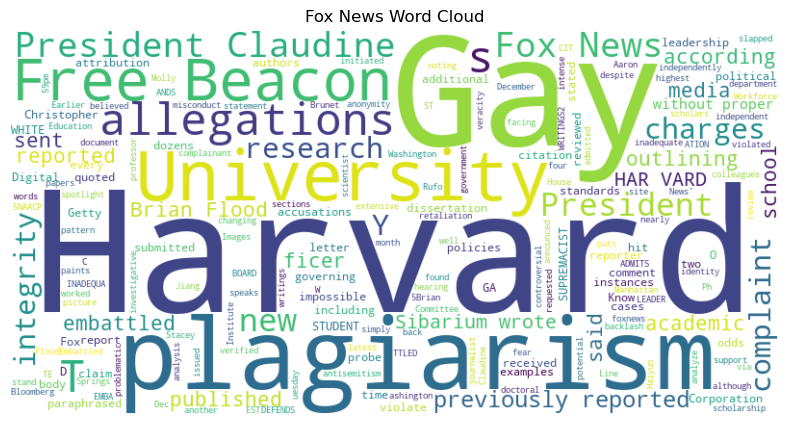

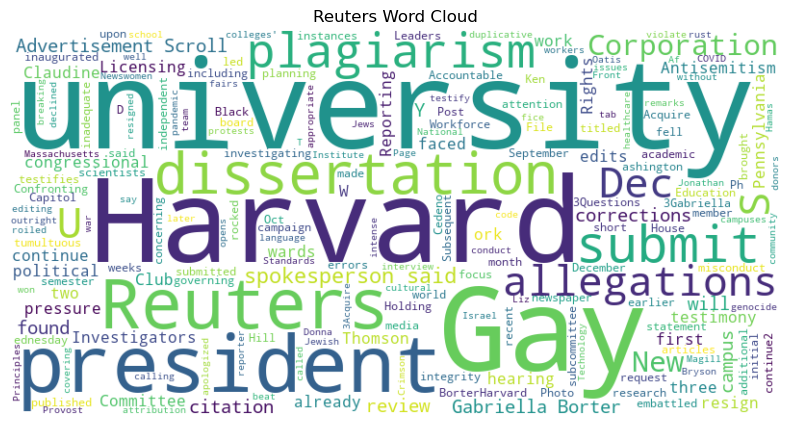

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to display word clouds
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Word clouds for each article
plot_wordcloud(fox_text, "Fox News Word Cloud")
plot_wordcloud(reuters_text, "Reuters Word Cloud")


## Question 9

The word clouds show the most common words in each article. The Fox News article repeats simpler words, while the Reuters article uses a wider variety of words. This shows that Fox News uses easier language, while Reuters is more detailed and formal.
